In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from google.colab import files
import random
from sklearn.model_selection import train_test_split
from math import ceil

Function for uploading file to Google Colab

In [2]:
files.upload()

Saving x06Simple(1).csv to x06Simple(1) (1).csv


{'x06Simple(1).csv': b'Index,Age,Temp of Water,Length of Fish\r\n1,14,25,620\r\n2,28,25,1315\r\n3,41,25,2120\r\n4,55,25,2600\r\n5,69,25,3110\r\n6,83,25,3535\r\n7,97,25,3935\r\n8,111,25,4465\r\n9,125,25,4530\r\n10,139,25,4570\r\n11,153,25,4600\r\n12,14,27,625\r\n13,28,27,1215\r\n14,41,27,2110\r\n15,55,27,2805\r\n16,69,27,3255\r\n17,83,27,4015\r\n18,97,27,4315\r\n19,111,27,4495\r\n20,125,27,4535\r\n21,139,27,4600\r\n22,153,27,4600\r\n23,14,29,590\r\n24,28,29,1305\r\n25,41,29,2140\r\n26,55,29,2890\r\n27,69,29,3920\r\n28,83,29,3920\r\n29,97,29,4515\r\n30,111,29,4520\r\n31,125,29,4525\r\n32,139,29,4565\r\n33,153,29,4566\r\n34,14,31,590\r\n35,28,31,1205\r\n36,41,31,1915\r\n37,55,31,2140\r\n38,69,31,2710\r\n39,83,31,3020\r\n40,97,31,3030\r\n41,111,31,3040\r\n42,125,31,3180\r\n43,139,31,3257\r\n44,153,31,3214\r\n'}

Random number generator, random integer in range, and random shuffle functions

In [3]:
#THE RANDOM NUMBER GENERATOR FUNCTION IS BY DEFAULT SEEDED WITH 0 IN THE FUNCTION
#DEFINITION
def r(seed=[0], m=2**32, a=1664525, c=1013904223):
  seed[0] = (a*seed[0]+c)%m
  return seed[0]

def randint(a, b):
  return int(a+(1+b-a)*r()/2**32)

def random_shuffle(data):
  len_data = data.shape[0]
  for i in range(len_data-1,0,-1):
    j = randint(0,i+1)
    data[[i,j]] = data[[j,i]]
  return data

Reading the CSV file, skipping the header information, and removing the index column.

In [ ]:
datax06_4 = np.genfromtxt('x06Simple(1).csv', delimiter=',', skip_header=1, dtype=int)
datax06_4 = np.delete(datax06_4, 0, 1)
datax06_4

Randomizing the data.

In [ ]:
datax06_4 = random_shuffle(datax06_4)
datax06_4

Separating dataset into X and Y variables

In [6]:
X06_4 = datax06_4[:,:-1]
Y06_4 = datax06_4[:,-1]

In [7]:
Y06_4

array([2805, 4566, 3257, 3920, 2600, 1315, 4525,  590, 3935, 2140, 4600,
       3110, 4535, 3180, 2120, 4465,  625,  590, 4315, 4520, 3535, 4570,
       1305, 2710, 4015, 3214, 4530, 4565, 3030,  620, 3040, 1205, 2890,
       3920, 4600, 4495, 3020, 2110, 2140, 3255, 4515, 1915, 1215, 4600])

Splitting the data into training and testing sets on a 2/3 - 1/3 basis with rounding-up.

In [8]:
X_train_4 = X06_4[:ceil(2/3*datax06_4.shape[0]),:]
X_test_4 = X06_4[ceil(2/3*datax06_4.shape[0]):,:]
Y_train_4 = Y06_4[:ceil(2/3*datax06_4.shape[0])]
Y_test_4 = Y06_4[ceil(2/3*datax06_4.shape[0]):]

Calculating the mean and standard deviation of both features from the training dataset.

In [9]:
X_train_mean_4 = np.mean(X_train_4, axis=0)
X_train_std_4 = np.std(X_train_4, axis=0, ddof=1)
print(X_train_mean_4, X_train_std_4)

[86.         27.73333333] [46.55289909  2.37709375]


Standardizing the data using the computed mean and standard deviation.

In [10]:
sX_train_4 = (X_train_4-X_train_mean_4)/X_train_std_4
sX_test_4 = (X_test_4-X_train_mean_4)/X_train_std_4

Adding the bias feature

In [11]:
bias_4 = np.ones((sX_train_4.shape[0],1))
bias_sX_train_4 = np.hstack((bias_4, sX_train_4))

bias_test_4 = np.ones((sX_test_4.shape[0],1))
bias_sX_test_4 = np.hstack((bias_test_4, sX_test_4))

Initializing the learn rate and theta array with random values in range [-1, 1]

In [12]:
learn_rate=0.01
theta4=np.random.uniform(low=-1, high=1, size=bias_sX_train_4.shape[1])
theta4

array([-0.92589779,  0.38095103, -0.43809261])

In [13]:
Y_train_4

array([2805, 4566, 3257, 3920, 2600, 1315, 4525,  590, 3935, 2140, 4600,
       3110, 4535, 3180, 2120, 4465,  625,  590, 4315, 4520, 3535, 4570,
       1305, 2710, 4015, 3214, 4530, 4565, 3030,  620])

In [14]:
bias_sX_train_4.T.shape

(3, 30)

In [15]:
(bias_sX_train_4 @ theta4).shape

(30,)

In [16]:
Y_train_4.shape

(30,)

In [17]:
#COMPUTING THE INITIAL RMSE OF THE THETA WITH RANDOM VALUES FOR THE STOP CONDITION
rmse_init=np.sqrt(np.square(np.subtract(Y_train_4, bias_sX_train_4 @ theta4).mean()))
#EMPTY ARRAY FOR THE RMSE OF THE TESTING AND TRAINING SETS
rmse_test_arr=np.array([])
rmse_train_arr=np.array([])
#COUNTER KEEPING TRACK OF ITERATIONS
i = 0
while i<1000:
  #UPDATING THETA PARAMETERS USING BATCH GRADIENT DESCENT
  theta4 = theta4-(learn_rate/bias_sX_train_4.shape[0])*bias_sX_train_4.T @ np.subtract(bias_sX_train_4 @ theta4, Y_train_4)
  #COMPUTING RMSE OF TRAINING DATA
  rmse4=np.sqrt(np.square(np.subtract(Y_train_4, bias_sX_train_4 @ theta4)).mean())
  #COMPUTING RMSE OF TESTING DATA
  rmse_test=np.sqrt(np.square(np.subtract(Y_test_4, bias_sX_test_4 @ theta4)).mean())
  #APPENDING TO THE ARRAYS OF RMSE FOR BOTH TRAINING AND TESTING DATA
  rmse_train_arr=np.append(rmse_train_arr, rmse4)
  rmse_test_arr = np.append(rmse_test_arr, rmse_test)
  #STOP CONDITION OF PERCENTAGE CHANGE IN RMSE IS SMALLER THAN GIVEN BOUNDARY
  if abs((rmse4-rmse_init)/rmse_init) < 2**-23:
    break
  #UPDATING RMSE OF PAST TRAINING ITERATION
  rmse_init=rmse4
  i+=1

Theta parameters and RMSE of testing data after gradient descent

In [18]:
theta4

array([3125.61721587, 1265.29060324, -328.29122066])

In [19]:
np.sqrt(np.square(np.subtract(Y_test_4, bias_sX_test_4 @ theta4)).mean())

615.9026922239779

The final model is:

$y = 3107.07277973 + 1140.68598726x_1 - 320.73786613x_2 $

Comparing results with closed form calculation

In [20]:
closedf=sklearn.linear_model.LinearRegression().fit(bias_sX_train_4, Y_train_4)
print(closedf.coef_)
print(closedf.intercept_)
y_pred_4 = closedf.predict(bias_sX_test_4)
print(np.sqrt(np.square(np.subtract(Y_test_4, y_pred_4)).mean()))

[   0.         1266.6599659  -329.49611507]
3126.9
616.0862025884471


Results confirmed

Plotting RMSE of training and testing sets as a function of number of iterations

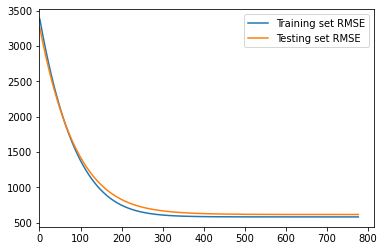

In [21]:
plt.plot(np.add(np.arange(i+1),1), rmse_train_arr, label='Training set RMSE')
plt.plot(np.add(np.arange(i+1),1), rmse_test_arr, label='Testing set RMSE')
plt.xlim(0,)
plt.legend()
plt.show()